# Эконометрика

- [ ] [Practical Data Science Cookbook: Data pre-processing, analysis and visualization using R and Python](http://library.lol/main/ED1DA610946160ABC42EA8957BFF5E39)
- [ ] [Marketing Data Science: Modeling Techniques in Predictive Analytics with R and Python](http://library.lol/main/21A91BA29E7D1BA1AD5F5BF9D3286E2B)
- [ ] [Modeling Techniques in Predictive Analytics with Python and R: A Guide to Data Science](http://library.lol/main/E5A88B105F15E6DAE2BB153CD8E47E3F)
- [ ] [Python for Marketing Research and Analytics](http://library.lol/main/48B799F91753F13EB8DA4D50B0A867AE)
- [ ] [Programming Exercise 1: Linear Regression](https://notebook.community/dibgerge/ml-coursera-python-assignments/Exercise1/exercise1)

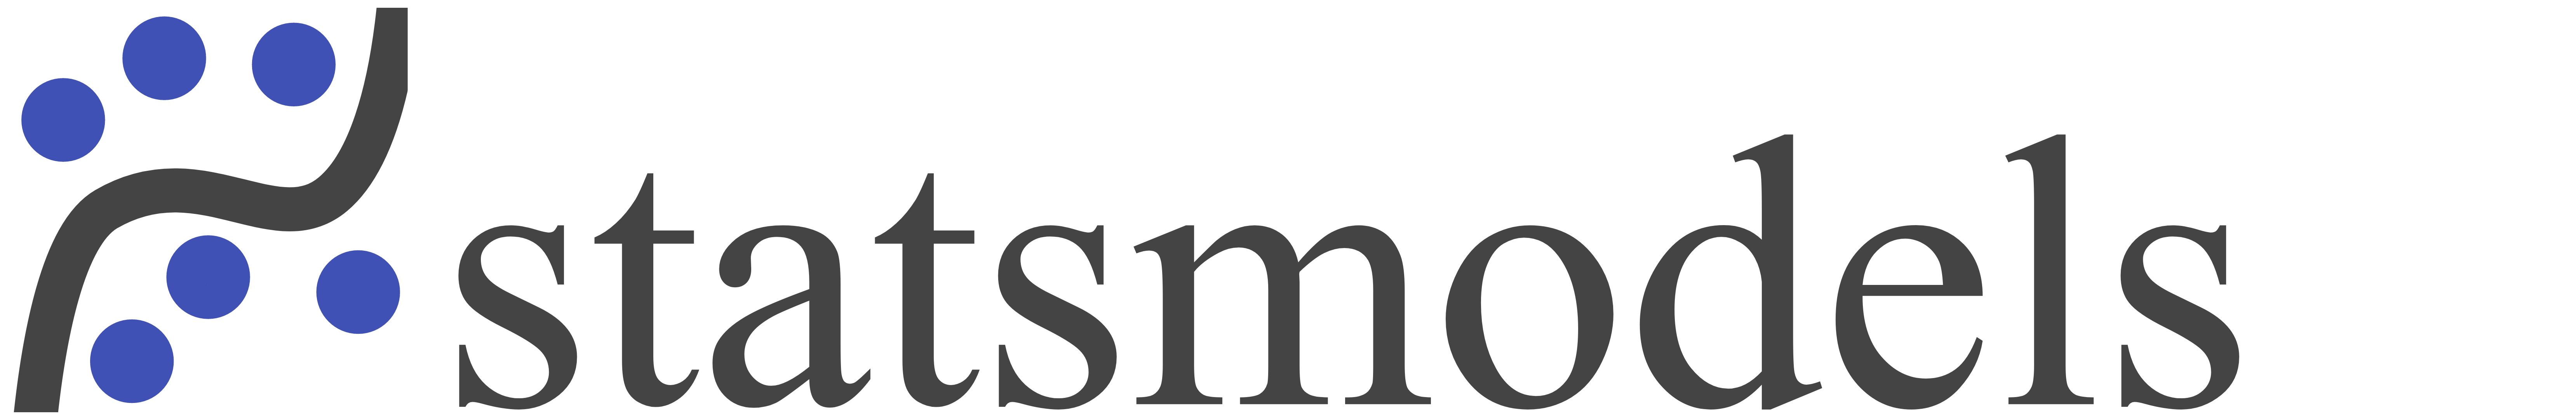

Источники: 

1. Wooldridge
2. Эконометрический анализ. Уильям Г. Грин
3. [Лекции QuantEcon Python Programming for Economics and Finance](https://python-programming.quantecon.org/about_py.html)
4. Эконометрия: учебник. Суслов В.И., Ибрагимов Н.М., Талышева Л.П., Цыплаков А.А. 2005

Другие статистические пакеты: 

* [statsmodels](http://statsmodels.sourceforge.net/) — различные статистические рутины
* [scikit-learn](https://scikit-learn.org/stable/) — Machine Learning в Python
* [PyTorch](https://pytorch.org/) — Deep learning фреймворк в Python, также существует несколько аналогов для тех же целей -  [TensorFlow](https://www.tensorflow.org/overview) and [Keras](https://keras.io/)
* [Pyro](https://pyro.ai/) and [PyStan](https://pystan.readthedocs.io/en/latest/) — Байесовский анализ данных на основе [Pytorch](https://pytorch.org/) и [stan](https://mc-stan.org/)
* [lifelines](https://lifelines.readthedocs.io/en/latest/) — Анализ выживаемости
* [GeoPandas](https://geopandas.org/en/stable/) — пространственный анализ данных

**Что такое эконометрика?**

В первом номере журнала *Econometrics* Рагнар Фриш писал об эконометрике следующее:

*Сущесвтует множество разнообразных методов количественного анализа экономических задач и ни один из них в отдельности не следует путать с эконометрикой в целом. Таким образом, эконометрика - это не тоже самое, что и экономическая статистика. Не совпадает эконометрика и с тем, что обычно называют экономической теорией, хотя значительная часть этой теории имеет выраженный численный характер. Также нельзя считать эконометрику синоноимом приложения математических методов к экономике.*

*Опыт показал, что, что каждый из этих трех подходов - статистический, теоретико-экономический и математический - необходим, но сам по себе не достаточен для полного понимания численных соотношений в экономике.*

*Мощным методом их описания будет только объединение всех трех методов. Это объединение и составляет* **эконометрику**.

# База Python из Wooldridge

## Modules

In [6]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy

## Numpy

In [19]:
import numpy as np

In [20]:
# define arrays in numpy:
testarray1D = np.array([1, 5, 41.3, 2.0])
print(f'type(testarray1D): {type(testarray1D)}\n')

type(testarray1D): <class 'numpy.ndarray'>



In [21]:
testarray2D = np.array([[4, 9, 8, 3],
                        [2, 6, 3, 2],
                        [1, 1, 7, 4]])

In [22]:
# get dimensions of testarray2D:
dim = testarray2D.shape
print(f'dim: {dim}\n')

dim: (3, 4)



In [23]:
# access elements by indices:
third_elem = testarray1D[2]
print(f'third_elem: {third_elem}\n')

third_elem: 41.3



In [24]:
second_third_elem = testarray2D[1, 2]  # element in 2nd row and 3rd column
print(f'second_third_elem: {second_third_elem}\n')

second_third_elem: 3



In [25]:
second_to_third_col = testarray2D[:, 1:3]  # each row in the 2nd and 3rd column
print(f'second_to_third_col: \n{second_to_third_col}\n')

second_to_third_col: 
[[9 8]
 [6 3]
 [1 7]]



In [26]:
# access elements by lists:
first_third_elem = testarray1D[[0, 2]]
print(f'first_third_elem: {first_third_elem}\n')

first_third_elem: [ 1.  41.3]



In [27]:
# same with Boolean lists:
first_third_elem2 = testarray1D[[True, False, True, False]]
print(f'first_third_elem2: {first_third_elem2}\n')

first_third_elem2: [ 1.  41.3]



In [28]:
k = np.array([[True, False, False, False],
              [False, False, True, False],
              [True, False, True, False]])
elem_by_index = testarray2D[k]  # 1st elem in 1st row, 3rd elem in 2nd row...
print(f'elem_by_index: {elem_by_index}\n')

elem_by_index: [4 3 1 7]



## Numpy Special Cases

In [9]:
# array of integers defined by the arguments start, end and sequence length:
sequence = np.linspace(0, 2, num=11)
print(f'sequence: \n{sequence}\n')

NameError: name 'np' is not defined

In [ ]:
# sequence of integers starting at 0, ending at 5-1:
sequence_int = np.arange(5)
print(f'sequence_int: \n{sequence_int}\n')

In [ ]:
# initialize array with each element set to zero:
zero_array = np.zeros((4, 3))
print(f'zero_array: \n{zero_array}\n')

In [ ]:
# initialize array with each element set to one:
one_array = np.ones((2, 5))
print(f'one_array: \n{one_array}\n')

In [ ]:
# uninitialized array (filled with arbitrary nonsense elements):
empty_array = np.empty((2, 3))
print(f'empty_array: \n{empty_array}\n')

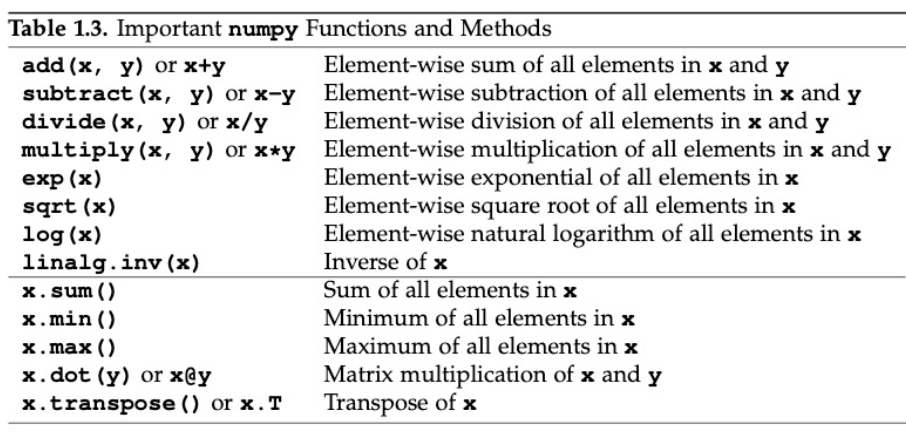

## Numpy Operations

In [35]:
# define an arrays in numpy:
mat1 = np.array([[4, 9, 8],
                 [2, 6, 3]])
mat2 = np.array([[1, 5, 2],
                 [6, 6, 0],
                 [4, 8, 3]])

In [36]:
# use a numpy function:
result1 = np.exp(mat1)
print(f'result1: \n{result1}\n')

result1: 
[[5.45981500e+01 8.10308393e+03 2.98095799e+03]
 [7.38905610e+00 4.03428793e+02 2.00855369e+01]]



In [37]:
result2 = mat1 + mat2[[0, 1]]  # same as np.add(mat1, mat2[[0, 1]])
print(f'result2: \n{result2}\n')

result2: 
[[ 5 14 10]
 [ 8 12  3]]



In [38]:
# use a method:
mat1_tr = mat1.transpose()
print(f'mat1_tr: \n{mat1_tr}\n')

mat1_tr: 
[[4 2]
 [9 6]
 [8 3]]



In [39]:
# matrix algebra:
matprod = mat1.dot(mat2)  # same as  mat1 @ mat2
print(f'matprod: \n{matprod}\n')

matprod: 
[[ 90 138  32]
 [ 50  70  13]]



## pandas

In [40]:
import pandas as pd

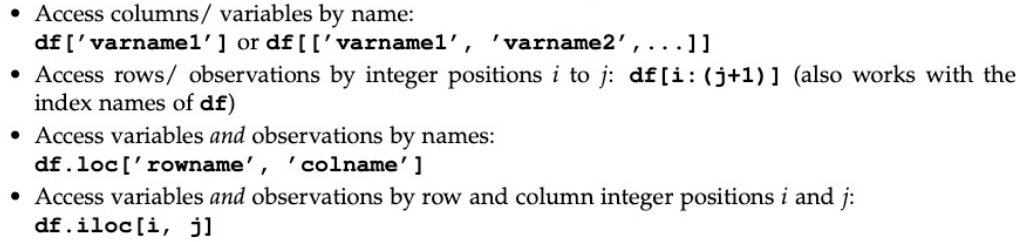

In [41]:
# define a pandas DataFrame:
icecream_sales = np.array([30, 40, 35, 130, 120, 60])
weather_coded = np.array([0, 1, 0, 1, 1, 0])
customers = np.array([2000, 2100, 1500, 8000, 7200, 2000])
df = pd.DataFrame({'icecream_sales': icecream_sales,
                   'weather_coded': weather_coded,
                   'customers': customers})

In [43]:
df

icecream_sales  weather_coded  customers
2010-04-30              30              0       2000
2010-05-31              40              1       2100
2010-06-30              35              0       1500
2010-07-31             130              1       8000
2010-08-31             120              1       7200
2010-09-30              60              0       2000

In [44]:
# define and assign an index (six ends of month starting in April, 2010)
# (details on generating indices are given in Chapter 10):
ourIndex = pd.date_range(start='04/2010', freq='M', periods=6)
df.set_index(ourIndex, inplace=True)

In [45]:
# print the DataFrame
print(f'df: \n{df}\n')

df: 
            icecream_sales  weather_coded  customers
2010-04-30              30              0       2000
2010-05-31              40              1       2100
2010-06-30              35              0       1500
2010-07-31             130              1       8000
2010-08-31             120              1       7200
2010-09-30              60              0       2000



In [46]:
# access columns by variable names:
subset1 = df[['icecream_sales', 'customers']]
print(f'subset1: \n{subset1}\n')

subset1: 
            icecream_sales  customers
2010-04-30              30       2000
2010-05-31              40       2100
2010-06-30              35       1500
2010-07-31             130       8000
2010-08-31             120       7200
2010-09-30              60       2000



In [47]:
# access second to fourth row:
subset2 = df[1:4]  # same as df['2010-05-31':'2010-07-31']
print(f'subset2: \n{subset2}\n')

subset2: 
            icecream_sales  weather_coded  customers
2010-05-31              40              1       2100
2010-06-30              35              0       1500
2010-07-31             130              1       8000



In [48]:
# access rows and columns by index and variable names:
subset3 = df.loc['2010-05-31', 'customers']  # same as df.iloc[1,2]
print(f'subset3: \n{subset3}\n')

subset3: 
2100



In [49]:
# access rows and columns by index and variable integer positions:
subset4 = df.iloc[1:4, 0:2]
# same as df.loc['2010-05-31':'2010-07-31', ['icecream_sales','weather']]
print(f'subset4: \n{subset4}\n')

subset4: 
            icecream_sales  weather_coded
2010-05-31              40              1
2010-06-30              35              0
2010-07-31             130              1



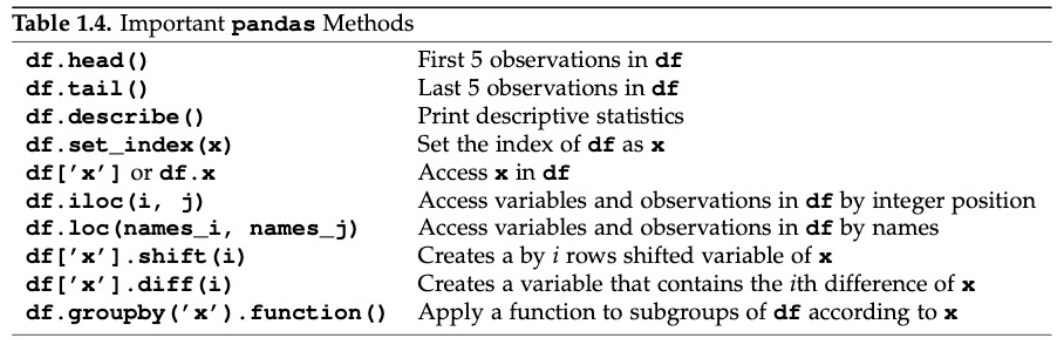

## pandas Operations

In [50]:
# define a pandas DataFrame:
icecream_sales = np.array([30, 40, 35, 130, 120, 60])
weather_coded = np.array([0, 1, 0, 1, 1, 0])
customers = np.array([2000, 2100, 1500, 8000, 7200, 2000])
df = pd.DataFrame({'icecream_sales': icecream_sales,
                   'weather_coded': weather_coded,
                   'customers': customers})

In [51]:
# define and assign an index (six ends of month starting in April, 2010)
# (details on generating indices are given in Chapter 10):
ourIndex = pd.date_range(start='04/2010', freq='M', periods=6)
df.set_index(ourIndex, inplace=True)

In [52]:
# include sales two months ago:
df['icecream_sales_lag2'] = df['icecream_sales'].shift(2)
print(f'df: \n{df}\n')

df: 
            icecream_sales  weather_coded  customers  icecream_sales_lag2
2010-04-30              30              0       2000                  NaN
2010-05-31              40              1       2100                  NaN
2010-06-30              35              0       1500                 30.0
2010-07-31             130              1       8000                 40.0
2010-08-31             120              1       7200                 35.0
2010-09-30              60              0       2000                130.0



In [53]:
# use a pandas.Categorical object to attach labels (0 = bad; 1 = good):
df['weather'] = pd.Categorical.from_codes(codes=df['weather_coded'],
                                          categories=['bad', 'good'])
print(f'df: \n{df}\n')

df: 
            icecream_sales  weather_coded  customers  icecream_sales_lag2  \
2010-04-30              30              0       2000                  NaN   
2010-05-31              40              1       2100                  NaN   
2010-06-30              35              0       1500                 30.0   
2010-07-31             130              1       8000                 40.0   
2010-08-31             120              1       7200                 35.0   
2010-09-30              60              0       2000                130.0   

           weather  
2010-04-30     bad  
2010-05-31    good  
2010-06-30     bad  
2010-07-31    good  
2010-08-31    good  
2010-09-30     bad  



In [54]:
# mean sales for each weather category:
group_means = df.groupby('weather').mean()
print(f'group_means: \n{group_means}\n')

group_means: 
         icecream_sales  weather_coded    customers  icecream_sales_lag2
weather                                                                 
bad           41.666667            0.0  1833.333333                 80.0
good          96.666667            1.0  5766.666667                 37.5



## Dara Reading

#### Wooldridge Dataframes

In [56]:
import wooldridge as woo

In [57]:
# load data:
wage1 = woo.dataWoo('wage1')

In [60]:
wage1

wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0     3.10    11      2       0         0       1        0       2     1   
1     3.24    12     22       2         0       1        1       3     1   
2     3.00    11      2       0         0       0        0       2     0   
3     6.00     8     44      28         0       0        1       0     1   
4     5.30    12      7       2         0       0        1       1     0   
..     ...   ...    ...     ...       ...     ...      ...     ...   ...   
521  15.00    16     14       2         0       1        1       2     0   
522   2.27    10      2       0         0       1        0       3     0   
523   4.67    15     13      18         0       0        1       3     0   
524  11.56    16      5       1         0       0        1       0     0   
525   3.50    14      5       4         1       1        0       2     0   

     northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0           0  ...         0      0         0         0        0        0   
1           0  ...         0      0         1         0        0        0   
2           0  ...         0      1         0         0        0        0   
3           0  ...         0      0         0         0        0        1   
4           0  ...         0      0         0         0        0        0   
..        ...  ...       ...    ...       ...       ...      ...      ...   
521         0  ...         0      0         0         1        1        0   
522         0  ...         0      1         0         0        1        0   
523         0  ...         0      0         0         0        1        0   
524         0  ...         0      0         0         0        0        0   
525         0  ...         0      0         0         1        0        1   

     servocc     lwage  expersq  tenursq  
0          0  1.131402        4        0  
1          1  1.175573      484        4  
2          0  1.098612        4        0  
3          0  1.791759     1936      784  
4          0  1.667707       49        4  
..       ...       ...      ...      ...  
521        0  2.708050      196        4  
522        0  0.819780        4        0  
523        0  1.541159      169      324  
524        0  2.447551       25        1  
525        0  1.252763       25       16  

[526 rows x 24 columns]

In [58]:
# get type:
print(f'type(wage1): \n{type(wage1)}\n')

type(wage1): 
<class 'pandas.core.frame.DataFrame'>



In [59]:
# get an overview:
print(f'wage1.head(): \n{wage1.head()}\n')

wage1.head(): 
   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4        0  
1        1  1

#### From File

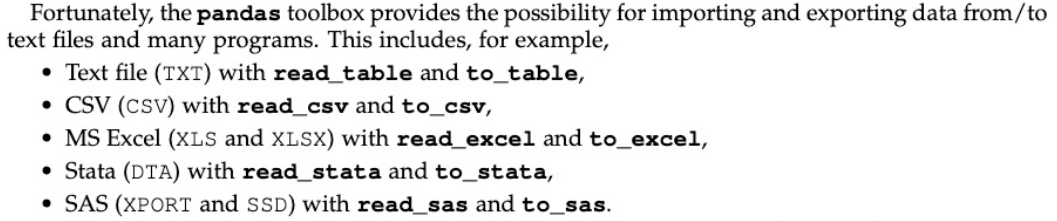

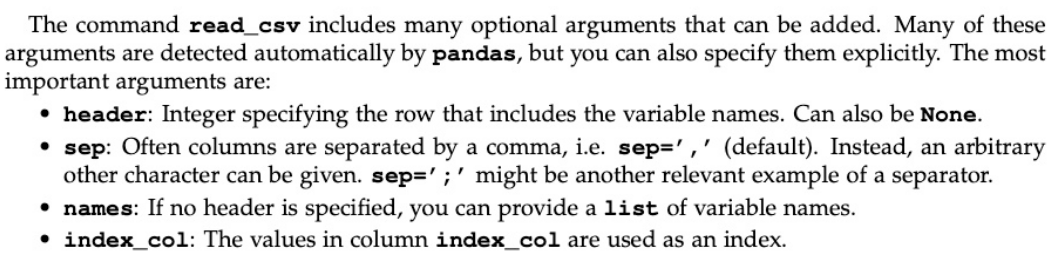

#### From WEB

In [63]:
import pandas_datareader as pdr

In [64]:
# download data for 'F' (= Ford Motor Company) and define start and end:
tickers = ['F']
start_date = '2014-01-01'
end_date = '2015-12-31'

In [65]:
# use pandas_datareader for the import:
F_data = pdr.data.DataReader(tickers, 'yahoo', start_date, end_date)

In [66]:
F_data

Attributes  Adj Close  Close   High    Low   Open      Volume
Symbols             F      F      F      F      F           F
Date                                                         
2013-12-31  10.649776  15.43  15.43  15.26  15.29  27829000.0
2014-01-02  10.656675  15.44  15.45  15.28  15.42  31528500.0
2014-01-03  10.704989  15.51  15.64  15.30  15.52  46122300.0
2014-01-06  10.753304  15.58  15.76  15.52  15.72  42657600.0
2014-01-07  10.615265  15.38  15.74  15.35  15.73  54476300.0
...               ...    ...    ...    ...    ...         ...
2015-12-24  10.609880  14.31  14.37  14.25  14.35   9000100.0
2015-12-28  10.513496  14.18  14.34  14.16  14.28  13697500.0
2015-12-29  10.550566  14.23  14.30  14.15  14.28  18867800.0
2015-12-30  10.506081  14.17  14.26  14.12  14.23  13800300.0
2015-12-31  10.446767  14.09  14.16  14.04  14.14  19881000.0

[505 rows x 6 columns]

**Sources of online data:**
1. Tiingo
2. IEX
3. Alpha Vantage
4. Econdb
5. Enigma
6. Quandl
7. St.Louis FED (FRED)
8. Kenneth French’s data library
9. World Bank
10. OECD
11. Eurostat
12. Thrift Savings Plan
13. Nasdaq Trader symbol definitions
14. Stooq
15. MOEX
16. Naver Finance
17. Yahoo Finance

## matplotlib

In [7]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# support of quadratic function
# (creates an array with 100 equispaced elements from -3 to 2):
x1 = np.linspace(-3, 2, num=100)
# function values for all these values:
y1 = x1 ** 2

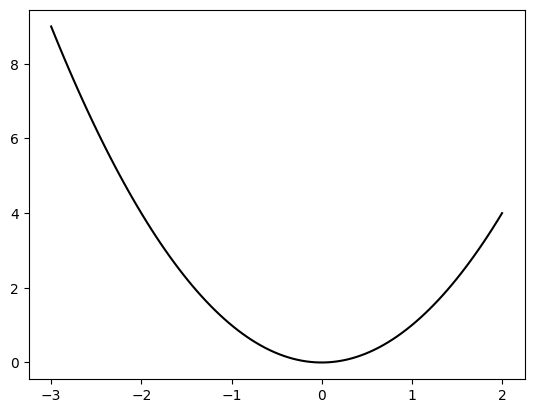

In [70]:
# plot quadratic function:
plt.plot(x1, y1, linestyle='-', color='black')

In [71]:
# same for normal density:
x2 = np.linspace(-4, 4, num=100)
y2 = stats.norm.pdf(x2)

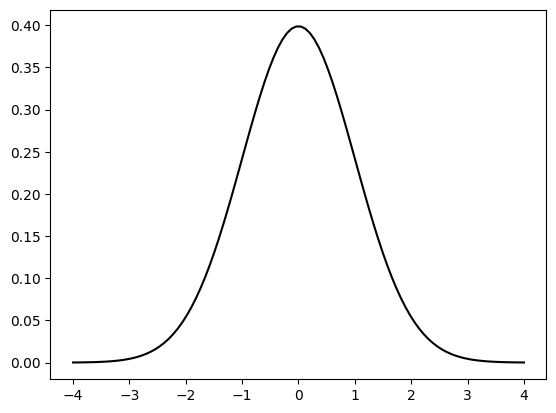

In [72]:
# plot normal density:
plt.plot(x2, y2, linestyle='-', color='black')

## Discriptive stats

In [73]:
import wooldridge as woo
import numpy as np
import pandas as pd

In [74]:
affairs = woo.dataWoo('affairs')
affairs

id  male   age  yrsmarr  kids  relig  educ  occup  ratemarr  naffairs  \
0       4     1  37.0     10.0     0      3    18      7         4         0   
1       5     0  27.0      4.0     0      4    14      6         4         0   
2       6     1  27.0      1.5     0      3    18      4         4         3   
3      11     0  32.0     15.0     1      1    12      1         4         0   
4      12     0  27.0      4.0     1      3    17      1         5         3   
..    ...   ...   ...      ...   ...    ...   ...    ...       ...       ...   
596  9001     1  47.0     15.0     0      4    14      5         4         0   
597  9010     0  32.0     15.0     1      3    14      1         5         1   
598  9012     1  37.0     10.0     1      2    18      6         2         0   
599  9023     1  37.0     15.0     1      3    17      5         4         0   
600  9029     0  27.0      4.0     1      2    16      1         4         0   

     affair  vryhap  hapavg  avgmarr  unhap  vryrel  smerel  slghtrel  notrel  
0         0       0       1        0      0       0       0         1       0  
1         0       0       1        0      0       0       1         0       0  
2         1       0       1        0      0       0       0         1       0  
3         0       0       1        0      0       0       0         0       0  
4         1       1       0        0      0       0       0         1       0  
..      ...     ...     ...      ...    ...     ...     ...       ...     ...  
596       0       0       1        0      0       0       1         0       0  
597       1       1       0        0      0       0       0         1       0  
598       0       0       0        0      1       0       0         0       1  
599       0       0       1        0      0       0       0         1       0  
600       0       0       1        0      0       0       0         0       1  

[601 rows x 19 columns]

In [75]:
# adjust codings to [0-4] (Categoricals require a start from 0):
affairs['ratemarr'] = affairs['ratemarr'] - 1

In [77]:
# use a pandas.Categorical object to attach labels for "haskids":
affairs['haskids'] = pd.Categorical.from_codes(affairs['kids'],categories=['no', 'yes'])
      

In [78]:
# ... and "marriage" (for example: 0 = 'very unhappy', 1 = 'unhappy',...):
mlab = ['very unhappy', 'unhappy', 'average', 'happy', 'very happy']
affairs['marriage'] = pd.Categorical.from_codes(affairs['ratemarr'],
                                                categories=mlab)

In [79]:
# frequency table in numpy (alphabetical order of elements):
ft_np = np.unique(affairs['marriage'], return_counts=True)
unique_elem_np = ft_np[0]
counts_np = ft_np[1]
print(f'unique_elem_np: \n{unique_elem_np}\n')
print(f'counts_np: \n{counts_np}\n')

unique_elem_np: 
['average' 'happy' 'unhappy' 'very happy' 'very unhappy']

counts_np: 
[ 93 194  66 232  16]



In [80]:
# frequency table in pandas:
ft_pd = affairs['marriage'].value_counts()
print(f'ft_pd: \n{ft_pd}\n')

ft_pd: 
very happy      232
happy           194
average          93
unhappy          66
very unhappy     16
Name: marriage, dtype: int64



In [81]:
# frequency table with groupby:
ft_pd2 = affairs['marriage'].groupby(affairs['haskids']).value_counts()
print(f'ft_pd2: \n{ft_pd2}\n')

ft_pd2: 
haskids  marriage    
no       very happy       96
         happy            40
         average          24
         unhappy           8
         very unhappy      3
yes      happy           154
         very happy      136
         average          69
         unhappy          58
         very unhappy     13
Name: marriage, dtype: int64



In [82]:
affairs = woo.dataWoo('affairs')

In [83]:
# attach labels (see previous script):
affairs['ratemarr'] = affairs['ratemarr'] - 1
affairs['haskids'] = pd.Categorical.from_codes(affairs['kids'],
                                               categories=['no', 'yes'])
mlab = ['very unhappy', 'unhappy', 'average', 'happy', 'very happy']
affairs['marriage'] = pd.Categorical.from_codes(affairs['ratemarr'],
                                                categories=mlab)

In [84]:
# counts for all graphs:
counts = affairs['marriage'].value_counts()
counts_bykids = affairs['marriage'].groupby(affairs['haskids']).value_counts()
counts_yes = counts_bykids['yes']
counts_no = counts_bykids['no']

([<matplotlib.patches.Wedge at 0x1ddcbeac9d0>,
 [Text(0.38551239610497706, 1.030233076759526, 'very unhappy'),
  Text(-1.0515328393543526, -0.3229221078826498, 'unhappy'),
  Text(0.2479751092027909, -1.0716848161730501, 'average'),
  Text(0.9587957908517588, -0.5391758817352188, 'happy'),
  Text(1.0961549481565562, -0.0918930336418256, 'very happy')])

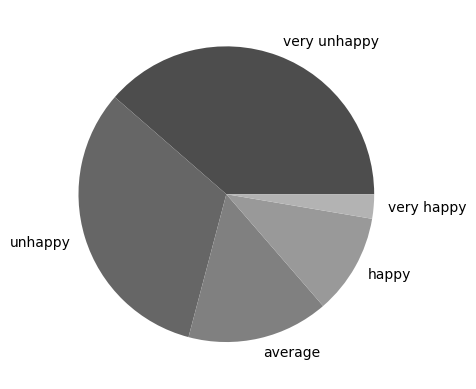

In [86]:
# pie chart (a):
grey_colors = ['0.3', '0.4', '0.5', '0.6', '0.7']
plt.pie(counts, labels=mlab, colors=grey_colors)

([<matplotlib.axis.YTick at 0x1ddcbdb6650>,
 [Text(0, 0, 'very unhappy'),
  Text(0, 1, 'unhappy'),
  Text(0, 2, 'average'),
  Text(0, 3, 'happy'),
  Text(0, 4, 'very happy')])

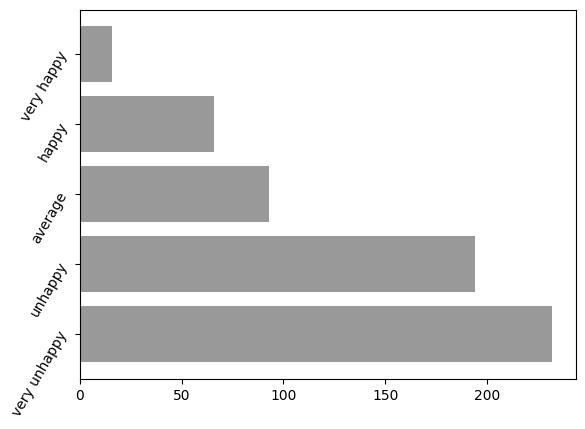

In [88]:
# horizontal bar chart (b):
y_pos = [0, 1, 2, 3, 4]  # the y locations for the bars
plt.barh(y_pos, counts, color='0.6')
plt.yticks(y_pos, mlab, rotation=60)  # add and adjust labeling

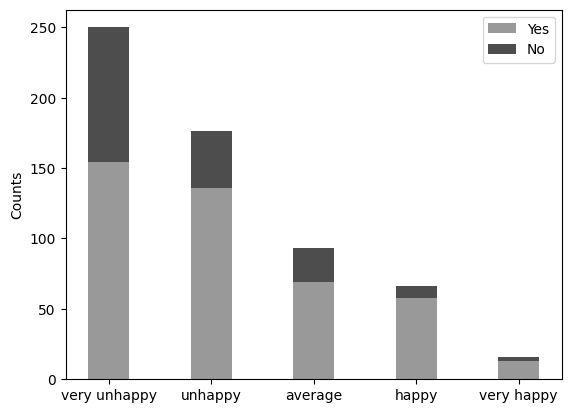

In [89]:
# stacked bar plot (c):
x_pos = [0, 1, 2, 3, 4]  # the x locations for the bars
plt.bar(x_pos, counts_yes, width=0.4, color='0.6', label='Yes')
# with 'bottom=counts_yes' bars are added on top of previous ones:
plt.bar(x_pos, counts_no, width=0.4, bottom=counts_yes, color='0.3', label='No')
plt.ylabel('Counts')
plt.xticks(x_pos, mlab)  # add labels on x axis
plt.legend()

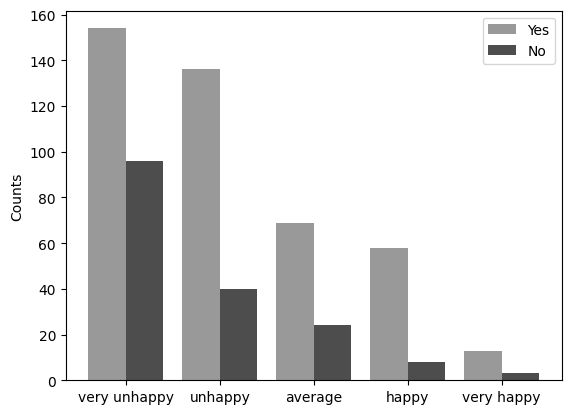

In [90]:
# grouped bar plot (d)
# add left bars first and move bars to the left:
x_pos_leftbar = [-0.2, 0.8, 1.8, 2.8, 3.8]
plt.bar(x_pos_leftbar, counts_yes, width=0.4, color='0.6', label='Yes')
# add right bars first and move bars to the right:
x_pos_rightbar = [0.2, 1.2, 2.2, 3.2, 4.2]
plt.bar(x_pos_rightbar, counts_no, width=0.4, color='0.3', label='No')
plt.ylabel('Counts')
plt.xticks(x_pos, mlab)
plt.legend()

## Distributions

In [91]:
import wooldridge as woo
import matplotlib.pyplot as plt

In [92]:
ceosal1 = woo.dataWoo('ceosal1')
ceosal1

salary  pcsalary         sales   roe       pcroe  ros  indus  finance  \
0      1095        20  27595.000000  14.1  106.400002  191      1        0   
1      1001        32   9958.000000  10.9  -30.600000   13      1        0   
2      1122         9   6125.899902  23.5  -16.299999   14      1        0   
3       578        -9  16246.000000   5.9  -25.700001  -21      1        0   
4      1368         7  21783.199219  13.8   -3.000000   56      1        0   
..      ...       ...           ...   ...         ...  ...    ...      ...   
204     930        10   1509.099976   9.0   20.500000  131      0        0   
205     525         3   1097.099976  15.5   20.100000   72      0        0   
206     658        32   4542.600098  12.1   -7.800000   68      0        0   
207     555         6   2023.000000  13.7  -14.600000   60      0        0   
208     626         0   1442.500000  14.4  -10.200000   62      0        0   

     consprod  utility   lsalary     lsales  
0           0        0  6.998509  10.225389  
1           0        0  6.908755   9.206132  
2           0        0  7.022868   8.720281  
3           0        0  6.359574   9.695602  
4           0        0  7.221105   9.988894  
..        ...      ...       ...        ...  
204         0        1  6.835185   7.319269  
205         0        1  6.263398   7.000426  
206         0        1  6.489205   8.421255  
207         0        1  6.318968   7.612337  
208         0        1  6.439351   7.274133  

[209 rows x 12 columns]

In [93]:
# extract roe:
roe = ceosal1['roe']

Text(0.5, 0, 'roe')

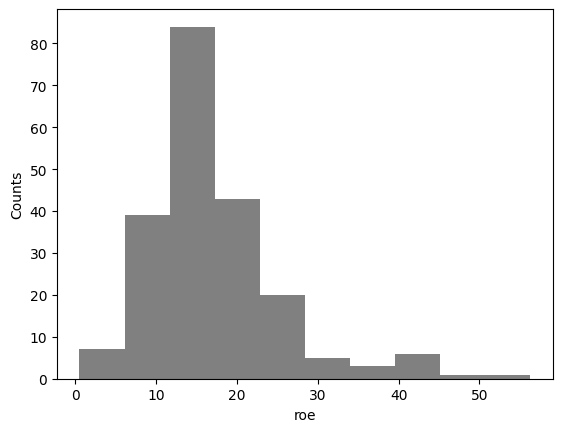

In [94]:
# subfigure a (histogram with counts):
plt.hist(roe, color='grey')
plt.ylabel('Counts')
plt.xlabel('roe')

Text(0.5, 0, 'roe')

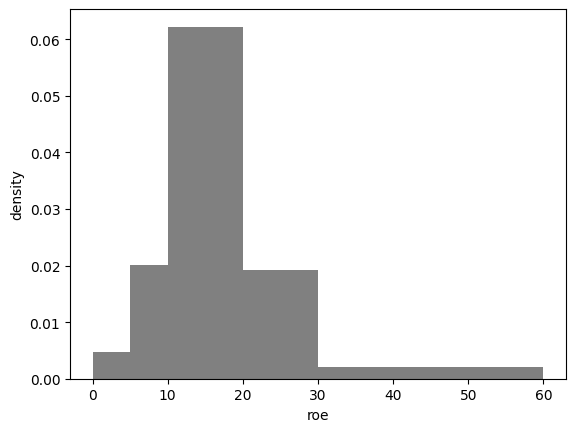

In [95]:
# subfigure b (histogram with density and explicit breaks):
breaks = [0, 5, 10, 20, 30, 60]
plt.hist(roe, color='grey', bins=breaks, density=True)
plt.ylabel('density')
plt.xlabel('roe')

In [ ]:
#остановился на стр. 38

# Simple Regression Model

**Основные методы:**

* ``results = ref.fit()`` - объект, который содержит всю инфу о регрессии
* ``b=ref.fit().params`` - оцененные параметры модели

    ``b[0]`` - значение интерцепта
    ``b[1]`` - значение параметра регрессора
    
* ``results.resid`` - ошибки регрессии
* ``results.fittedvalues`` - значение модели
* ``results.summary`` - таблица регрессии

## CEO Salary

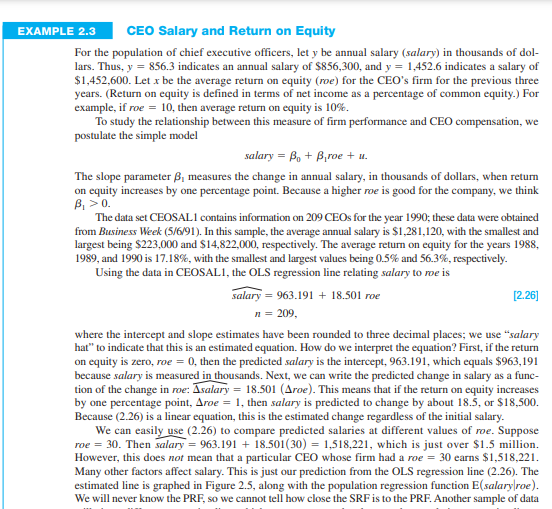

In [66]:
# salary - годовая зп гендиректоров
# ROE - return on equity (рентабельсность собственного капитала) в предыдущие 3 года

In [8]:
import wooldridge as woo
import statsmodels.formula.api as smf # Общие способы статистического анализа
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

In [7]:
ceosal1

salary  pcsalary         sales   roe       pcroe  ros  indus  finance  \
0      1095        20  27595.000000  14.1  106.400002  191      1        0   
1      1001        32   9958.000000  10.9  -30.600000   13      1        0   
2      1122         9   6125.899902  23.5  -16.299999   14      1        0   
3       578        -9  16246.000000   5.9  -25.700001  -21      1        0   
4      1368         7  21783.199219  13.8   -3.000000   56      1        0   
..      ...       ...           ...   ...         ...  ...    ...      ...   
204     930        10   1509.099976   9.0   20.500000  131      0        0   
205     525         3   1097.099976  15.5   20.100000   72      0        0   
206     658        32   4542.600098  12.1   -7.800000   68      0        0   
207     555         6   2023.000000  13.7  -14.600000   60      0        0   
208     626         0   1442.500000  14.4  -10.200000   62      0        0   

     consprod  utility   lsalary     lsales  
0           0        0  6.998509  10.225389  
1           0        0  6.908755   9.206132  
2           0        0  7.022868   8.720281  
3           0        0  6.359574   9.695602  
4           0        0  7.221105   9.988894  
..        ...      ...       ...        ...  
204         0        1  6.835185   7.319269  
205         0        1  6.263398   7.000426  
206         0        1  6.489205   8.421255  
207         0        1  6.318968   7.612337  
208         0        1  6.439351   7.274133  

[209 rows x 12 columns]

In [35]:
ceosal1['roe'].describe()

count    209.000000
mean      17.184211
std        8.518509
min        0.500000
25%       12.400000
50%       15.500000
75%       20.000000
max       56.299999
Name: roe, dtype: float64

In [36]:
ceosal1['salary'].describe()

count      209.000000
mean      1281.119617
std       1372.345308
min        223.000000
25%        736.000000
50%       1039.000000
75%       1407.000000
max      14822.000000
Name: salary, dtype: float64

In [13]:
# ingredients to the OLS formulas:
cov_xy = np.cov(x, y)[1, 0]  # access 2. row and 1. column of covariance matrix
cov_xy

1342.5383979609712

In [14]:
var_x = np.var(x, ddof=1)
var_x

72.5649897747341

In [15]:
x_bar = np.mean(x)
y_bar = np.mean(y)
[x_bar,y_bar]

[17.18421050521175, 1281.1196172248804]

In [16]:
# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 18.501186345214926

b0: 963.1913364725579



In [18]:
reg=smf.ols(formula='salary~roe',data=ceosal1)
results=reg.fit()
results.params

Intercept    963.191336
roe           18.501186
dtype: float64

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sat, 01 Oct 2022   Prob (F-statistic):             0.0978
Time:                        01:48:21   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---------------
* При нулевой ROE (Рентабельность собственного капитала) 963.1913к - это минимальная зп CEO в США


* Каждая дополнительная единица ROE (1 п.п.) дает 18.5к премии к годовой ЗП CEO. (Чем выше ROE, тем лучше для компании)
-----------------------

* **ROE ОЧЕНЬ ПЛОХО ОБЪЯСНЯЕТ ВАРИАЦИЮ ЗП CEO (только 1.3%)**

Text(0.5, 0, 'roe')

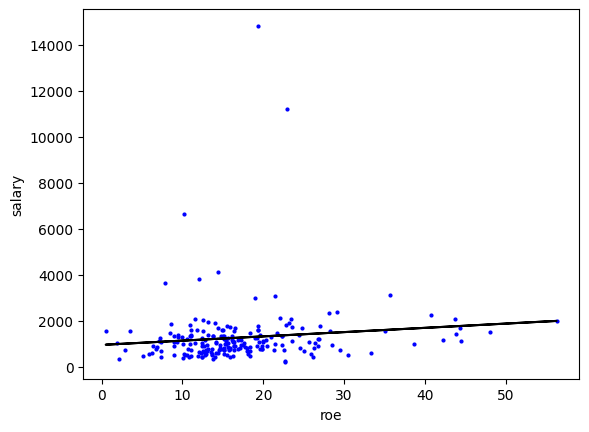

In [20]:
# scatter plot and fitted values:
plt.scatter('roe', 'salary', data=ceosal1, color='blue', marker='o',s=4)
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')

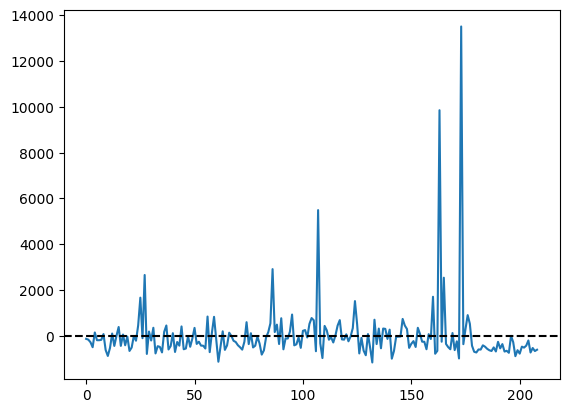

In [21]:
plt.plot(results.resid.index,results.resid)
plt.axhline(results.resid.mean(),color='black', linestyle='--')

In [22]:
results.fittedvalues

0      1224.058071
1      1164.854261
2      1397.969216
3      1072.348338
4      1218.507712
          ...     
204    1129.702014
205    1249.959725
206    1187.055698
207    1216.657586
208    1229.608413
Length: 209, dtype: float64

In [24]:
res_table=pd.DataFrame({'salary':ceosal1['salary'],'roe':ceosal1['roe'],
                        'salary_fitted':results.fittedvalues,'resids':results.resid})
res_table

salary   roe  salary_fitted      resids
0      1095  14.1    1224.058071 -129.058071
1      1001  10.9    1164.854261 -163.854261
2      1122  23.5    1397.969216 -275.969216
3       578   5.9    1072.348338 -494.348338
4      1368  13.8    1218.507712  149.492288
..      ...   ...            ...         ...
204     930   9.0    1129.702014 -199.702014
205     525  15.5    1249.959725 -724.959725
206     658  12.1    1187.055698 -529.055698
207     555  13.7    1216.657586 -661.657586
208     626  14.4    1229.608413 -603.608413

[209 rows x 4 columns]

In [25]:
res_table.mean()

salary           1.281120e+03
roe              1.718421e+01
salary_fitted    1.281120e+03
resids          -4.699781e-13
dtype: float64

In [26]:
res_table.sum()

salary           2.677540e+05
roe              3.591500e+03
salary_fitted    2.677540e+05
resids          -9.822543e-11
dtype: float64

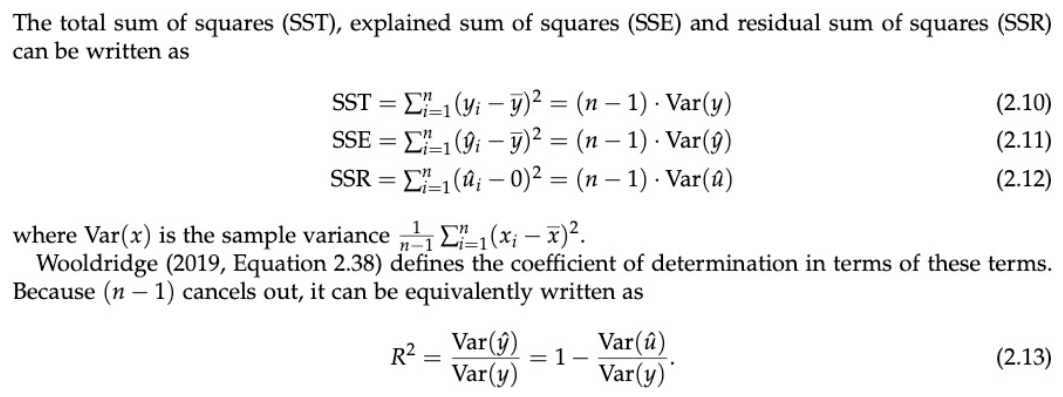

In [27]:
# calculate predicted values & residuals:
sal_hat = results.fittedvalues
u_hat = results.resid

# calculate R^2 in three different ways:
sal = ceosal1['salary']
R2_a = np.var(sal_hat, ddof=1) / np.var(sal, ddof=1)
R2_b = 1 - np.var(u_hat, ddof=1) / np.var(sal, ddof=1)
R2_c = np.corrcoef(sal, sal_hat)[1, 0] ** 2

print(f'R2_a: {R2_a}\n')
print(f'R2_b: {R2_b}\n')
print(f'R2_c: {R2_c}\n')

R2_a: 0.01318862408103412

R2_b: 0.01318862408103394

R2_c: 0.013188624081034077



R^2 - доля вариации в y выборки, объясненная x

## Эффект изменения единиц измерения

In [49]:
ceosal1['salarydol']=ceosal1['salary']*1000

In [50]:
reg=smf.ols(formula='salarydol~roe',data=ceosal1)
results=reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salarydol   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sat, 01 Oct 2022   Prob (F-statistic):             0.0978
Time:                        02:19:47   Log-Likelihood:                -3248.3
No. Observations:                 209   AIC:                             6501.
Df Residuals:                     207   BIC:                             6507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.632e+05   2.13e+05      4.517      0.000    5.43e+05    1.38e+06
roe          1.85e+04   1.11e+04      1.663      0.098   -3428.196    4.04e+04
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Nonlinearity

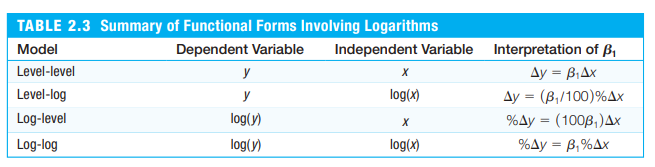

Модель постоянной эластичности

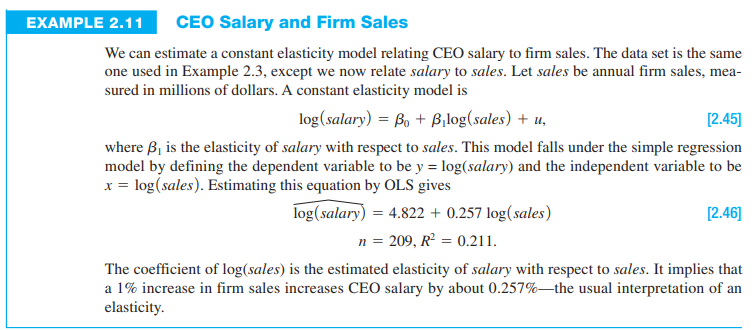

In [61]:
reg=smf.ols(formula='np.log(salary)~np.log(sales)',data=ceosal1)
results=reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.70e-12
Time:                        02:48:30   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8220      0.288     16.723      0.000       4.254       5.390
np.log(sales)     0.2567      0.035      7.436      0.000       0.189       0.325
==============================================================================
Omnibus:                       84.151   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.831
Skew:                           1.507   Prob(JB):                     2.04e-88
Kurtosis:                       9.106   Cond. No.                         70.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* beta1 здесь будет эластичностю зп CEO относительно продаж
* 1% повышения продаж повышает ЗП CEO на 0.26%

## Regression through the Origin or on Constant

In [64]:
ceosal1 = woo.dataWoo('ceosal1')

In [65]:
# usual OLS regression:
reg1 = smf.ols(formula='salary ~ roe', data=ceosal1)
results1 = reg1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sat, 01 Oct 2022   Prob (F-statistic):             0.0978
Time:                        02:53:54   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# regression without intercept (through origin):
reg2 = smf.ols(formula='salary ~ 0 + roe', data=ceosal1)
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.422
Model:                            OLS   Adj. R-squared (uncentered):              0.419
Method:                 Least Squares   F-statistic:                              151.9
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                    1.46e-26
Time:                        02:53:55   Log-Likelihood:                         -1814.4
No. Observations:                 209   AIC:                                      3631.
Df Residuals:                     208   BIC:                                      3634.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
roe           63.5380      5.156     12.324      0.000      53.374      73.702
==============================================================================
Omnibus:                      283.910   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21020.750
Skew:                           5.958   Prob(JB):                         0.00
Kurtosis:                      50.664   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# regression without slope (on a constant):
reg3 = smf.ols(formula='salary ~ 1', data=ceosal1)
results3 = reg3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                nan
Time:                        02:54:53   Log-Likelihood:                -1805.9
No. Observations:                 209   AIC:                             3614.
Df Residuals:                     208   BIC:                             3617.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1281.1196     94.927     13.496      0.000    1093.977    1468.262
==============================================================================
Omnibus:                      309.491   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30470.101
Skew:                           6.855   Prob(JB):                         0.00
Kurtosis:                      60.541   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sal_mean: 1281.1196172248804



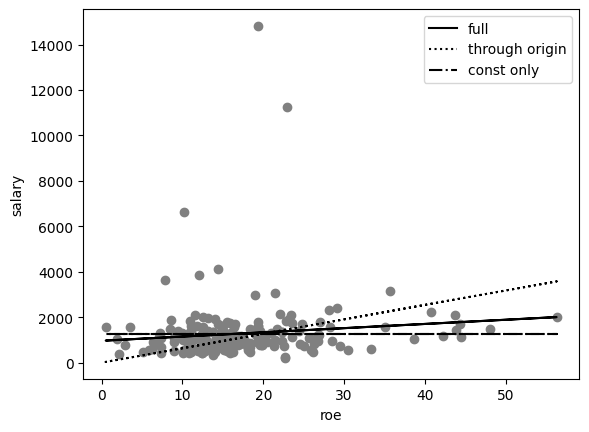

In [68]:
# average y:
sal_mean = np.mean(ceosal1['salary'])
print(f'sal_mean: {sal_mean}\n')

# scatter plot and fitted values:
plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o',
         linestyle='', label='')
plt.plot(ceosal1['roe'], results1.fittedvalues, color='black',
         linestyle='-', label='full')
plt.plot(ceosal1['roe'], results2.fittedvalues, color='black',
         linestyle=':', label='through origin')
plt.plot(ceosal1['roe'], results3.fittedvalues, color='black',
         linestyle='-.', label='const only')
plt.ylabel('salary')
plt.xlabel('roe')
plt.legend()

## Wage and Education

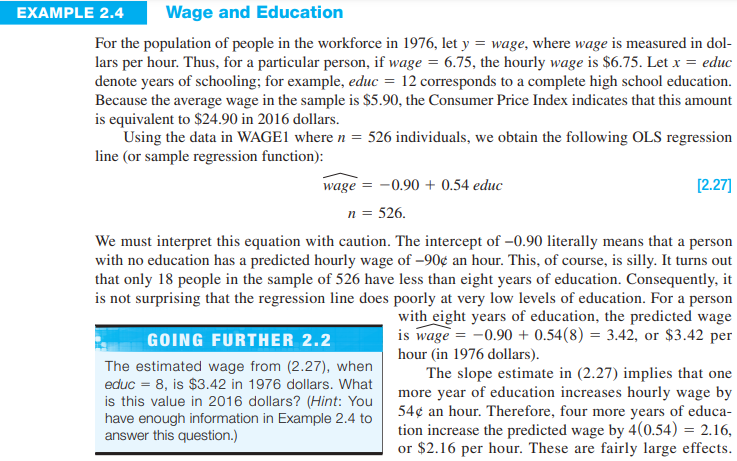

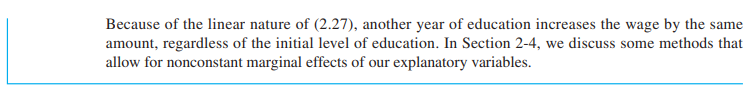

In [ ]:
# wage - $/час
# educ - законченных дет образования, где 12 - это законченная старшая школа

In [37]:
wage1 = woo.dataWoo('wage1')
wage1

wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0     3.10    11      2       0         0       1        0       2     1   
1     3.24    12     22       2         0       1        1       3     1   
2     3.00    11      2       0         0       0        0       2     0   
3     6.00     8     44      28         0       0        1       0     1   
4     5.30    12      7       2         0       0        1       1     0   
..     ...   ...    ...     ...       ...     ...      ...     ...   ...   
521  15.00    16     14       2         0       1        1       2     0   
522   2.27    10      2       0         0       1        0       3     0   
523   4.67    15     13      18         0       0        1       3     0   
524  11.56    16      5       1         0       0        1       0     0   
525   3.50    14      5       4         1       1        0       2     0   

     northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0           0  ...         0      0         0         0        0        0   
1           0  ...         0      0         1         0        0        0   
2           0  ...         0      1         0         0        0        0   
3           0  ...         0      0         0         0        0        1   
4           0  ...         0      0         0         0        0        0   
..        ...  ...       ...    ...       ...       ...      ...      ...   
521         0  ...         0      0         0         1        1        0   
522         0  ...         0      1         0         0        1        0   
523         0  ...         0      0         0         0        1        0   
524         0  ...         0      0         0         0        0        0   
525         0  ...         0      0         0         1        0        1   

     servocc     lwage  expersq  tenursq  
0          0  1.131402        4        0  
1          1  1.175573      484        4  
2          0  1.098612        4        0  
3          0  1.791759     1936      784  
4          0  1.667707       49        4  
..       ...       ...      ...      ...  
521        0  2.708050      196        4  
522        0  0.819780        4        0  
523        0  1.541159      169      324  
524        0  2.447551       25        1  
525        0  1.252763       25       16  

[526 rows x 24 columns]

In [46]:
wage1['wage'].describe()

count    526.000000
mean       5.896103
std        3.693086
min        0.530000
25%        3.330000
50%        4.650000
75%        6.880000
max       24.980000
Name: wage, dtype: float64

In [47]:
wage1['educ'].describe()

count    526.000000
mean      12.562738
std        2.769022
min        0.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       18.000000
Name: educ, dtype: float64

In [38]:
reg = smf.ols(formula='wage ~ educ', data=wage1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept   -0.904852
educ         0.541359
dtype: float64



Text(0.5, 0, 'educ')

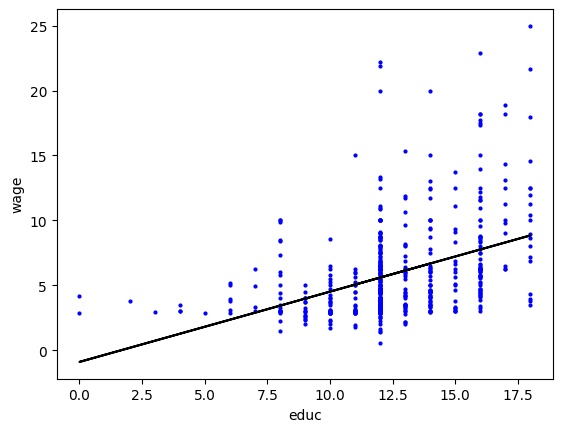

In [39]:
plt.scatter('educ', 'wage', data=wage1, color='blue', marker='o',s=4)
plt.plot(wage1['educ'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('wage')
plt.xlabel('educ')

In [40]:
# obtain coefficients, predicted values and residuals:
b = results.params
wage_hat = results.fittedvalues
u_hat = results.resid

# confirm property (1):
u_hat_mean = np.mean(u_hat)
print(f'u_hat_mean: {u_hat_mean}\n')

# confirm property (2):
educ_u_cov = np.cov(wage1['educ'], u_hat)[1, 0]
print(f'educ_u_cov: {educ_u_cov}\n')

# confirm property (3):
educ_mean = np.mean(wage1['educ'])
wage_pred = b[0] + b[1] * educ_mean
print(f'wage_pred: {wage_pred}\n')

wage_mean = np.mean(wage1['wage'])
print(f'wage_mean: {wage_mean}\n')

u_hat_mean: -6.132821331465504e-15

educ_u_cov: 1.3263464400855204e-15

wage_pred: 5.896102674787041

wage_mean: 5.896102674787035



In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.78e-22
Time:                        02:03:25   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646
==============================================================================
Omnibus:                      212.554   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.843
Skew:                           1.861   Prob(JB):                    3.79e-176
Kurtosis:                       7.797   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* нулевое образование при прочих равныз дает отрицательную зп, вероятнее всего потому что такого нет в выборке


* каждый год образования дает прибавку в 54 цена к почасовой ЗП. Диплом старшей школы дает почасовую ЗП В 6.5$ /час

In [45]:
0.5414*12

6.4968

## Nonlinearity

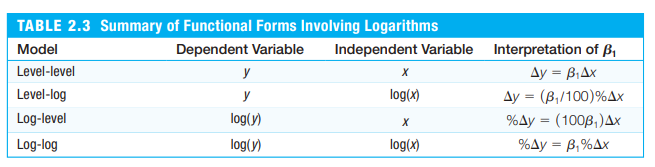

Отношение между почасовой зп и образование должно быть нелинейным, т.к. нереалистично полагать, что первый год образования дает тот же выигрыш, что 12-ый (старшая школа) или 16-ый (вуз). 

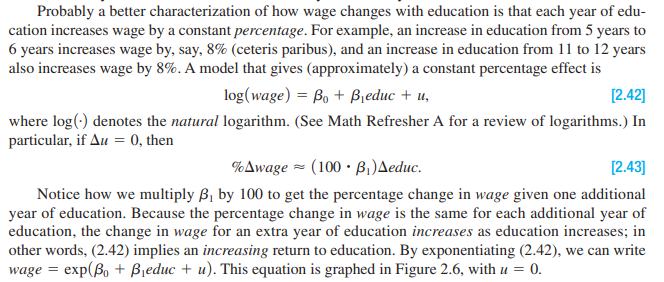

In [55]:
wage1 = woo.dataWoo('wage1')

# estimate log-level model:
reg = smf.ols(formula='np.log(wage) ~ educ', data=wage1)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           3.27e-25
Time:                        02:31:46   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

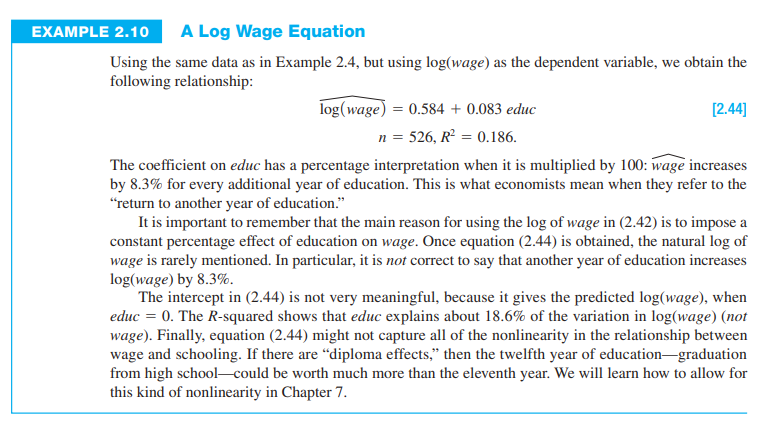

* educ*100 имеет интерпретацию в процентах, т.е. ЗП/час вырастает на 8.3% с каждым дополнительным годом образования (НЕ log(ЗП)!!!!!!!!!!)

* интерцепт не имеет особой интерпретации

Text(0.5, 0, 'educ')

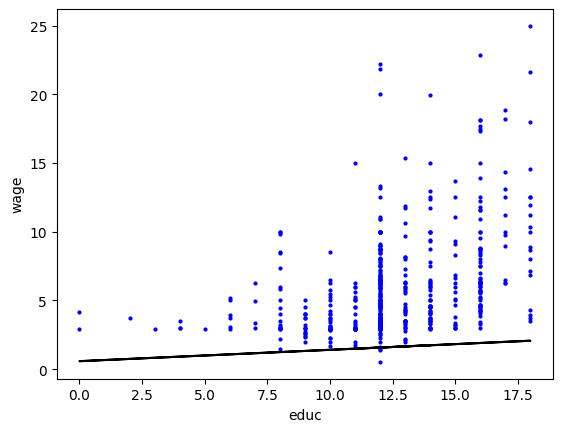

In [56]:
plt.scatter('educ', 'wage', data=wage1, color='blue', marker='o',s=4)
plt.plot(wage1['educ'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('wage')
plt.xlabel('educ')

## Voting Outcomes and Campaign Expenditures

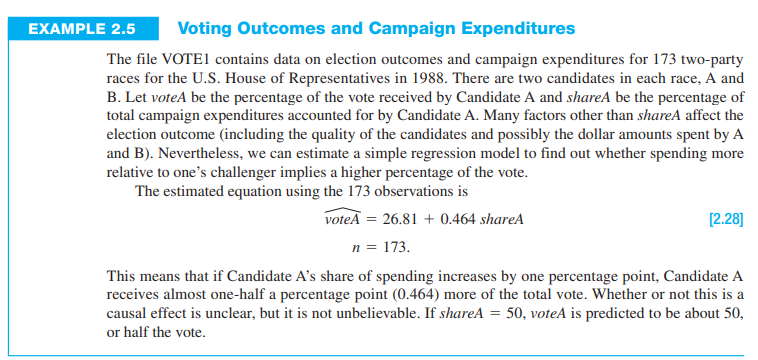

In [ ]:
# voteA -  % кандидата в палату представителей США 
# shareA -  % кандидата в расходах на изберательную команию

In [28]:
vote1 = woo.dataWoo('vote1')
vote1

state  district  democA  voteA     expendA      expendB  prtystrA  \
0      AL         7       1     68  328.295990     8.737000        41   
1      AK         1       0     62  626.377014   402.476990        60   
2      AZ         2       1     73   99.607002     3.065000        55   
3      AZ         3       0     69  319.690002    26.281000        64   
4      AR         3       0     75  159.220993    60.054001        66   
..    ...       ...     ...    ...         ...          ...       ...   
168    WV         4       0     39   32.039001   152.270996        42   
169    WI         3       1     32   22.625999   359.800995        53   
170    WI         5       0     36  197.460007  1278.526001        36   
171    WI         7       0     38  202.591003   450.716003        46   
172    WI         8       1     30   14.421000   227.822998        47   

     lexpendA  lexpendB     shareA  
0    5.793916  2.167567  97.407669  
1    6.439952  5.997638  60.881039  
2    4.601233  1.120048  97.014763  
3    5.767352  3.268846  92.403702  
4    5.070293  4.095244  72.612473  
..        ...       ...        ...  
168  3.466954  5.025662  17.383217  
169  3.119100  5.885551   5.916420  
170  5.285536  7.153463  13.378174  
171  5.311189  6.110837  31.010078  
172  2.668685  5.428569   5.953087  

[173 rows x 10 columns]

In [29]:
# OLS regression:
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    26.812214
shareA        0.463827
dtype: float64



Text(0.5, 0, 'shareA')

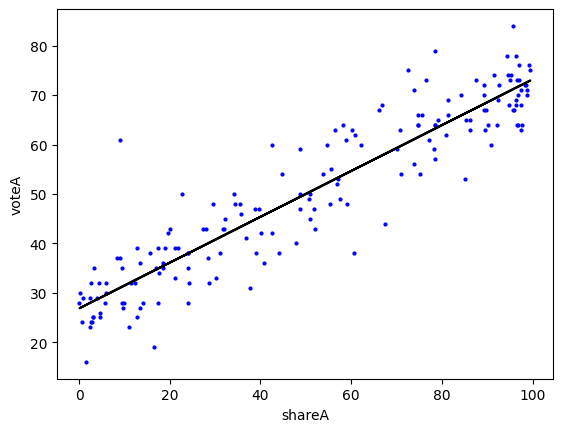

In [30]:
# scatter plot and fitted values:
plt.scatter('shareA', 'voteA', data=vote1, color='blue', marker='o', s=4)
plt.plot(vote1['shareA'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('voteA')
plt.xlabel('shareA')

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           6.63e-74
Time:                        01:50:14   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.000      25.061      28.564
shareA         0.4638      0.015     31.901      0.000       0.435       0.493
==============================================================================
Omnibus:                       20.747   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.613
Skew:                           0.525   Prob(JB):                     2.05e-10
Kurtosis:                       5.255   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Gauss-Markov Theorem

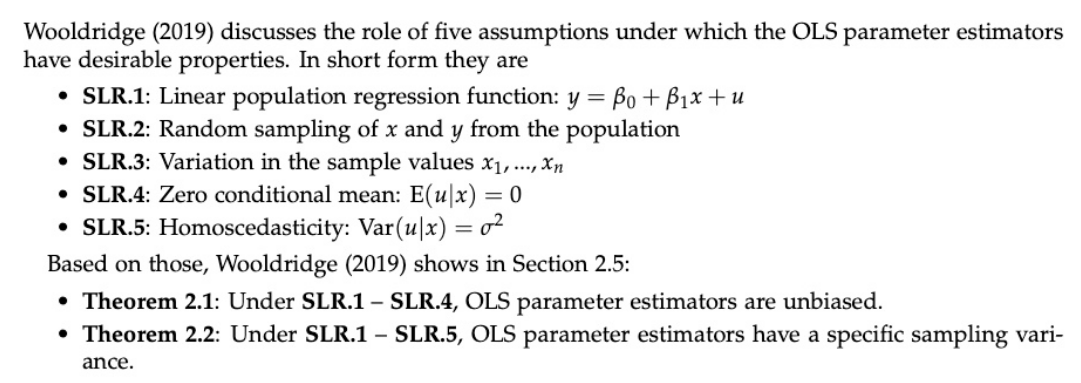

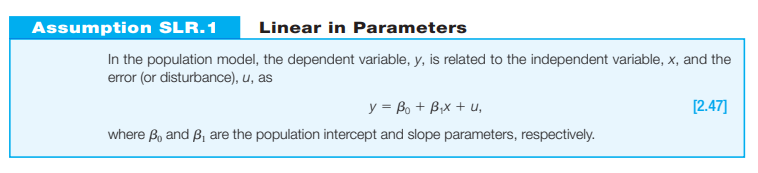

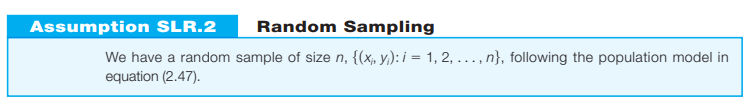

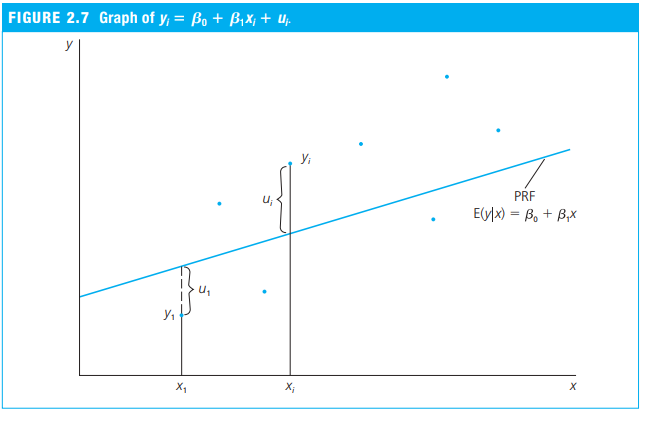

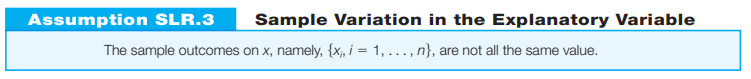

Проверяется простой описательной статистикой: если вариация в x равна 0, то SLR3 не выполняется

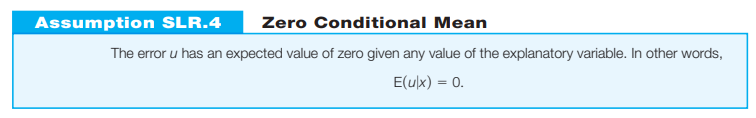

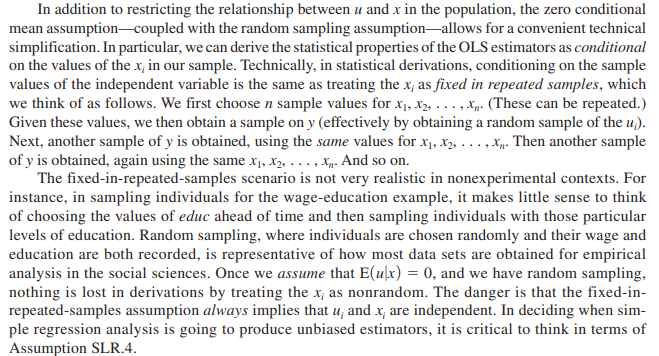

Если условное матоожидание ошибки = 0 и выполняется случайное сэмплирование, то 

# Модели ограниченной зависимой переменной и коррекция селекции выборки

**LDV** = **Limited Dependent Variable** - это такие модели, где объясняемая переменная существенно ограничена. 

* Примерами может служить бинарная переменная и проценты (доли).Оптимизирующие поведение некоторых индивидов зачастую приводит к возниконовению угловых решений, выбирая, например, нулевое значение потребления некоторого товара. 
* Другим примером являются счетчики, которые моделируются моделью Пуассона.

**Binary Responce models**: Logit, Probit

$P(y=1|\textbf{x})=P(y=1|x_1,x_2,...x_k)=G(\beta_0+\beta_1 x_1+...+\beta_k x_k)=G(\beta_0+\textbf{x} \beta)$

Рассмотрим теперь модели, в которых зависимая переменная принимает только два значения, т.е. является фиктивной переменной.

В биномиальную модель входит изучаемая переменная $x$, принимающая два
значения, а также объясняющие переменные $z$, которые содержат факторы, определяющие выбор одного из значений. Без потери общности будем предполагать, что $x$ принимает значения $0$ и $1$.

Пусть на основе имеющихся наблюдений мы оценили регрессию: $x=z\alpha + \epsilon$. Однако эта модель будет предсказывать абсурдные значения объясняемой переменной $x$, т.е. меньше нуля, больше нуля и дробные. 

С более формальной точки зрения данная модель не может быть корректна, т.к. у биномииальной зависимой переменной будет распределение Бернулли, то есть оно полностью задается вероятностью получения единицы.

$E(x)=P(x=1)*1 +P(x=0)*1=P(x=1)$

Ожидание $x$ при данном $z$:
$E(x)=z\alpha+E(\epsilon)=z\alpha$

Таким образом, $E(x)=P(x=1)=z\alpha$, т.е. вероятность ограничена, но равна не ограниченной величине и мат. ожидание может описываться только нелиейной функцией. 

Теперь получим модель, которая принимает во внимание тот факт, что вероятность не может выходить за пределы 0 и 1, и проста в оценке.

$P(x=1)=F(z\alpha)$, где $F$ - некоторая достаточно простая функция, преобразующая $z\alpha$ в число от 0 до 1. 
Естественно выбрать в качестве этой функции какую-либо дифференцируемую функцию распределенения, определенную во всей действительной прямой.

Заметим, что если выбрать распределение соотсветсвующее равномерному распределению на отрезке от 0 до 1, то окажется что система:
* $E(x)=P(x=1)$=... (система)
* $0, z\alpha<=0$
* $z\alpha<=0, 0=<z\alpha<=1$
* $1, z\alpha>=1$

Но выбор равномерного распределения скорее усложняет оценку, чем ее упрощает, т.к. мат. ожидание является здесь нелинейной функцийе от ниеизвестного парвметра $\alpha$, т.е. это нелинейная регрессия, причем функция недиффернецируема. 

Линейная модель вероятности когда изучаемая зависимость слаба, и в имеющихся данных доля как нулей, так и единиц слишкмои мала. 

**Удобные для логит-оценок распределения**

(оба они симметричны относительно 0)

1. **Логистическое распределение** (**ЛОГИТ**)

$\lambda(y)=\frac{e^y}{(1+e^y)^2}$ - плотность логистического распределения

$\Lambda(y)=\frac{e^y}{(1+e^y)}=\frac{1}{1+e^{-y}}$ - функция распеределения

Модель с биномиальной зависимой переменной с логистическими респределенным отклонением называют **логит**. Для логита:

$E(x)=P(x=1)=\Lambda(z\alpha)=\frac{e^{z\alpha}}{1+e^{z\alpha}}=\frac{1}{1+e^{-z\alpha}}$

2. **Нормальное распределение** (**ПРОБИТ**)

Модель с номрально расредленным отклонением $\epsilon$ называется  **пробит**. 
При этом используется стандартное нормальное распределение, т.е. 
$E(x)=P(x=1)=\Phi(z\alpha)=\int \phi(t)dt= \frac{1}{\sqrt{2\pi}} \int e^{-t^2/2}dt$ 

Логистическое распределение похоже на нормальное с нулевым ожиданием и дисперсией $\pi^2/3$. В связи с этим оценки коэффициентов в моделяъ различаются примерно на множитель $\frac{\pi}{\sqrt{3}} \approx 1.8$

Если вероятности далеки от границ 0 И 1 (около 0.5), то более точной оценкой множителя является величина $\phi(0)/\lambda(0)=\sqrt{8/\pi} \approx 1.6$. 

При малом количестве наблюдений из=за схожести распределений сложно решить, когда следует применять логит, а когда - пробит. 

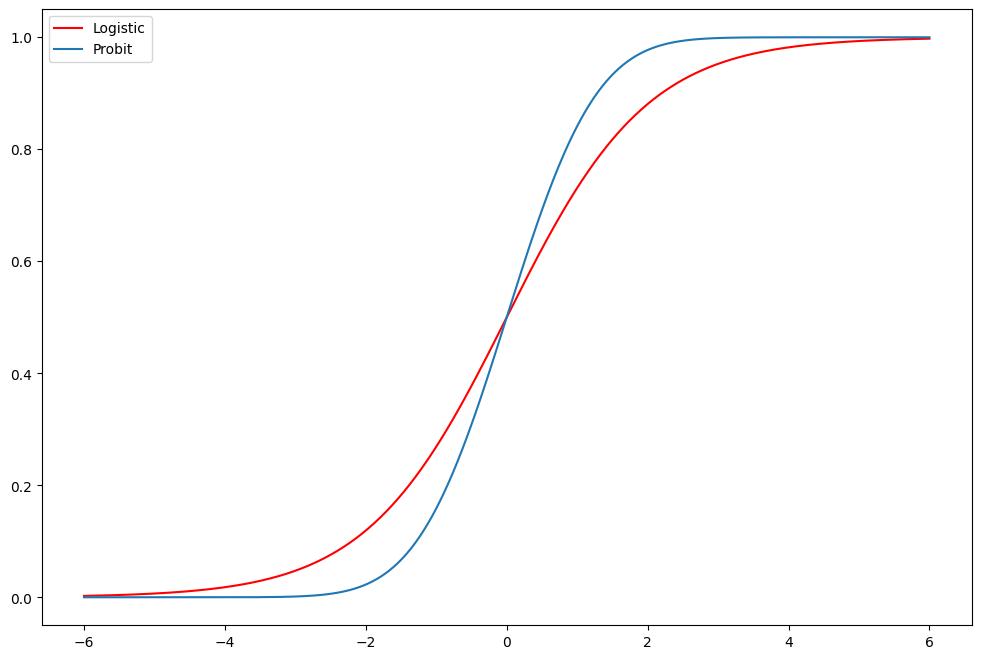

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), "r-", label="Logistic")
ax.plot(support, stats.norm.cdf(support), label="Probit")
ax.legend()

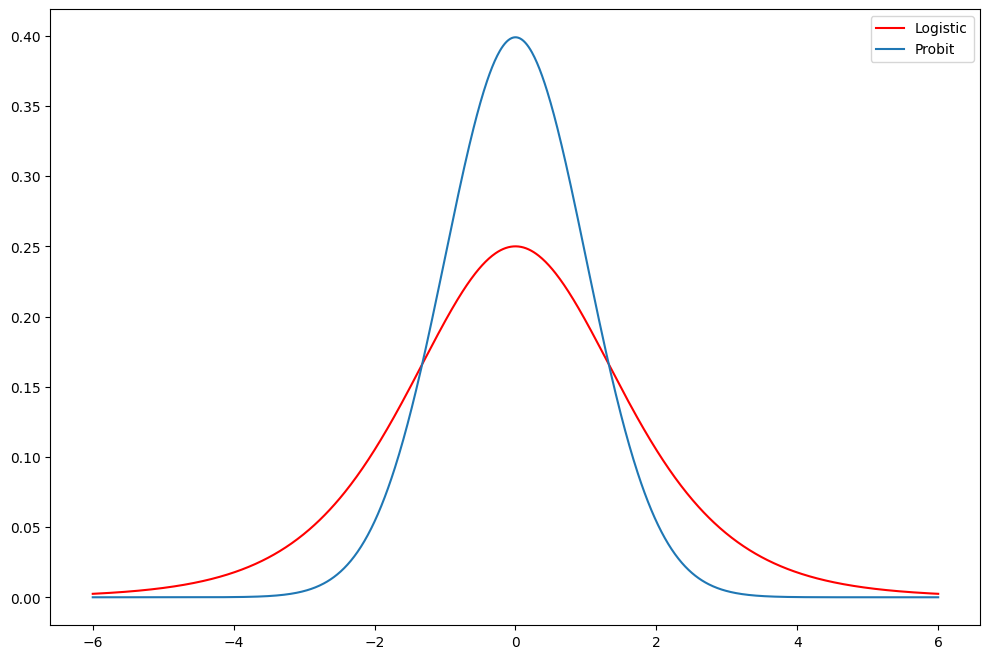

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), "r-", label="Logistic")
ax.plot(support, stats.norm.pdf(support), label="Probit")
ax.legend()

## Оценивание моделей с биномиальной перемеменной

Пусть требуется получить оценки коэффциента $\alpha$ по $N$ наблюдений $(x_i,z_i), i=1,...N$. Здесь наблюдения $x_i$ независимы и имет биномиальные распределением с одим исптыанием и распределением $P(x=1)=F(z_i \alpha)$

Можно рассмотреть модель с биномиальной переменной с зависимой переменной как модель регрессии: $x_i=F(z_i \alpha)+\xi_i$, где ошибки $\xi_i=x_i-F(z_i \alpha)$ имеют нулевое математическое ожидание и независимы. Каждая из ошибок $\xi_i$ может принимать только 2 значения, и поэьтому их распределение мало похоже на нормальное. 

Кроме того, имеет место гетероскедастичность. Обозначим $p_i=p_i(\alpha)=F(z_i \alpha)$

В этих обозначениях дисперсия ошибки $\xi_i$ равна (мы воспользовались $x_i^2=x_i$ и $E(x_i)=p_i$) 

$var(\xi_i)=E[(x_i - p_i)^2]=E(x_i^2)-2p_i E(x_i) + p_i^2=p_i(1-p_i)$

Несмотря на эти нарушения стандартных предположений, данную модель, которая в общем случае представляет собой модель нелинейной регрессии, можно
оценить нелинейным методом наименьших квадратов, минимизируя по $\alpha$ следующую сумму квадратов:

$\sum (i=1,N) (x_i-p_i(\alpha))^2$

Для минимизации такой суммы квадратов требуется использовать какой-либо
алгоритм нелинейной оптимизации. Этот метод дает состоятельные оценки коэффициентов α.  

Гетероскедастичность приводит к двум важным последствиям.
* Во-первых, оценки параметров будут неэффективными (не самыми точными). 
* Во-вторых, что более серьезно, ковариационная матрица коэффициентов, стандартные ошибки коэффициентов и t-статистики будут вычисляться некорректно (если использовать стандартные процедуры оценивания нелинейной регрессии и получения в ней оценки ковариационной матрицы оценок параметров).

В частном случае модели линейной вероятности имеем линейную регрессию
с гетероскедастичными ошибками: $x_i=z_i \alpha+\xi_i$

Для такой модели можно предложить следующую процедуру, делающую поправку на гетероскедастичность:
1. Оцениваем модель обычным МНК и получаем оценки a.
2. Находим оценки вероятностей: $p_i = z_i\alpha$
3. Используем взвешенную регрессию и получаем оценки $\alpha∗$

Чтобы оценить взвешенную регрессию, следует разделить каждое наблюдение исходной модели на корень из оценки и дисперсии ошибки, т.е. на величину
$\sqrt{p_i(1 − p_i)} = \sqrt{z_i\alpha(1 − z_i\alpha)}$:

$\frac{x_i}{\sqrt{p_i(1 − p_i}}=\frac{z_i}{\sqrt{p_i(1 − p_i}}+\frac{\xi_i}{\sqrt{p_i(1 − p_i}}$

и далее применить к этой преобразованной регрессии обычный методнаименьших
квадратов. При использовании данного метода получим асимптотически эффективные оценки $\alpha∗$ и корректную ковариационную матрицу этих оценок, на основе которой можно рассчитать t -статистики.


(стр 300)

## Интерпретацмя результатов оценки моделей с биномиальной переменной

Предположим, что каким-либо методом получен вектор оценок $\alpha$. Как в этом
случае можно интерпретировать результаты и судить о качестве модели?

Для логита коэффициенты a описывают влияние факторов на логарифм соотношения шансов. В общем случае по знаку коэффициентов можно судить о направлении зависимости, а по соответствующим t-статистикам — о наличии или отсутствии зависимости. Однако интерпретировать коэффициенты в содержательных
терминах затруднительно. Поэтому помимо коэффициентов полезно рассмотреть,
как влияют факторы на вероятность получения единицы:


$\frac{\partial F(Z\alpha)}{\partial z_j}=f(z\alpha)\alpha_j$

Эти величины называют маргинальными значениями. Ясно, что маргинальные
значения зависят от точки z, в которой они рассматриваются. Обычно берут z на среднем уровне по имеющимся наблюдениям: z = ¯z. Другой распространенный
подход состоит в том, чтобы вычислить маргинальные значения во всех точках
zi, i = 1, ..., N, и по ним вычислить средние маргинальные значения:

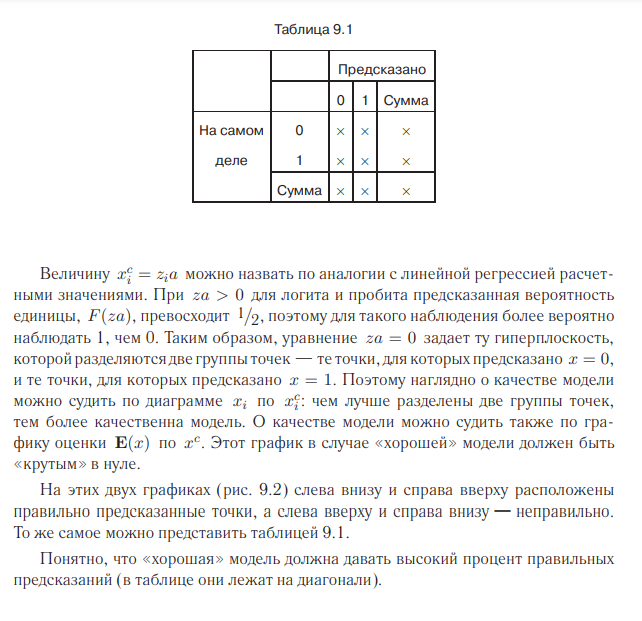

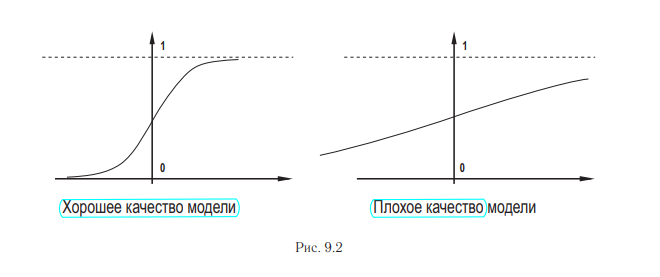

# Мусор

[Пакет для выгрузки данных World Bank](https://pypi.org/project/wbgapi/)

In [4]:
import wbgapi as wb

In [6]:
wb.source.info()

id    name                                                                  code      concepts  lastupdated
----  --------------------------------------------------------------------  ------  ----------  -------------
1     Doing Business                                                        DBS              3  2021-08-18
2     World Development Indicators                                          WDI              3  2022-09-16
3     Worldwide Governance Indicators                                       WGI              3  2022-09-23
5     Subnational Malnutrition Database                                     SNM              3  2016-03-21
6     International Debt Statistics                                         IDS              4  2022-01-14
11    Africa Development Indicators                                         ADI              3  2013-02-22
12    Education Statistics                                                  EDS              3  2020-12-20
13    Enterprise Surveys                                                    ESY              3  2022-03-25
14    Gender Statistics                                                     GDS              3  2022-06-23
15    Global Economic Monitor                                               GEM              3  2020-07-27
16    Health Nutrition and Population Statistics                            HNP              3  2022-09-19
18    IDA Results Measurement System                                        IDA              3  2021-07-23
19    Millennium Development Goals                                          MDG              3  2018-09-19
20    Quarterly Public Sector Debt                                          PSD              3  2022-10-24
22    Quarterly External Debt Statistics SDDS                               QDS              3  2022-10-17
23    Quarterly External Debt Statistics GDDS                               QDG              3  2022-10-17
25    Jobs                                                                  JOB              3  2022-06-29
27    Global Economic Prospects                                             GEP              3  2022-06-07
28    Global Financial Inclusion                                            FDX              3  2022-10-24
29    The Atlas of Social Protection: Indicators of Resilience and Equity   GSP              3  2021-12-20
30    Exporter Dynamics Database – Indicators at Country-Year Level         ED1              3  2016-03-31
31    Country Policy and Institutional Assessment                           CPI              3  2022-09-15
32    Global Financial Development                                          GFD              3  2022-09-23
33    G20 Financial Inclusion Indicators                                    G2F              3  2019-02-27
34    Global Partnership for Education                                      GPE              3  2013-04-12
35    Sustainable Energy for All                                            SE4              3  2018-06-30
36    Statistical Capacity Indicators                                       BBS              3  2021-02-03
37    LAC Equity Lab                                                        LEL              3  2016-04-06
38    Subnational Poverty                                                   SNP              3  2015-04-27
39    Health Nutrition and Population Statistics by Wealth Quintile         HNQ              3  2021-12-13
40    Population estimates and projections                                  HPP              3  2022-07-01
41    Country Partnership Strategy for India (FY2013 - 17)                  CPS              3  2015-05-22
43    Adjusted Net Savings                                                  WAT              3  2022-09-20
45    Indonesia Database for Policy and Economic Research                   IDD              3  2022-08-11
46    Sustainable Development Goals                                         SDG              3  2022-07-22
50    Subnational Population         

## Тренд роста мирового ВВП

In [194]:
import wbgapi as wb
import pandas as pd
import statsmodels.formula.api as smf # Общие способы статистического анализа
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.tsa.tsatools as tsa

In [203]:
world_gdp=wb.data.DataFrame(['NY.GDP.MKTP.KD.ZG'], 'WLD', mrv=82).transpose()

In [204]:
world_gdp

economy       WLD
YR1961   3.790542
YR1962   5.316458
YR1963   5.184865
YR1964   6.558489
YR1965   5.549192
...           ...
YR2017   3.379490
YR2018   3.276646
YR2019   2.614882
YR2020  -3.271219
YR2021   5.802057

[61 rows x 1 columns]

In [205]:
world_gdp.index=[i[2:] for i in list(world_gdp.index)]

In [206]:
world_gdp=tsa.add_trend(world_gdp,'t')

In [207]:
reg=smf.ols(formula='WLD~trend+I(trend**2)+I(trend**3)',data=world_gdp)
results=reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WLD   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.493
Date:                Sat, 29 Oct 2022   Prob (F-statistic):            0.00220
Time:                        02:21:01   Log-Likelihood:                -112.26
No. Observations:                  61   AIC:                             232.5
Df Residuals:                      57   BIC:                             241.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2041      0.860      7.216      0.000       4.482       7.926
trend            -0.2494      0.119     -2.093      0.041      -0.488      -0.011
I(trend ** 2)     0.0067      0.004      1.514      0.136      -0.002       0.016
I(trend ** 3) -6.061e-05   4.71e-05     -1.286      0.204      -0.000    3.38e-05
==============================================================================
Omnibus:                       20.594   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.142
Skew:                          -1.195   Prob(JB):                     1.05e-07
Kurtosis:                       5.634   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'WORLD GROWTH')

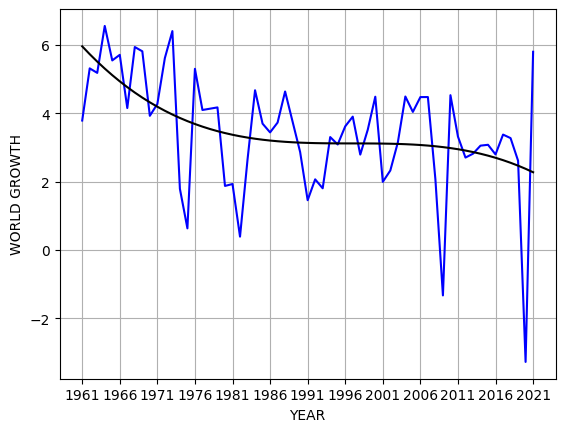

In [210]:
plt.plot('WLD', data=world_gdp, color='Blue')
plt.plot(results.fittedvalues, color='black', linestyle='-')
plt.grid()
plt.xticks(np.arange(0, 65, step=5))
plt.xlabel('YEAR')
plt.ylabel('WORLD GROWTH')

## Тренд роста российского ВВП

In [218]:
rus_gdp=wb.data.DataFrame(['NY.GDP.MKTP.KD.ZG'], 'RUS', mrv=22).transpose()

In [219]:
rus_gdp.index=[i[2:] for i in list(rus_gdp.index)]

In [220]:
rus_gdp=tsa.add_trend(rus_gdp,'t')

In [221]:
rus_gdp

RUS  trend
2000  10.000067    1.0
2001   5.100051    2.0
2002   4.699992    3.0
2003   7.299952    4.0
2004   7.199948    5.0
2005   6.399965    6.0
2006   8.200068    7.0
2007   8.499978    8.0
2008   5.199969    9.0
2009  -7.799994   10.0
2010   4.500000   11.0
2011   4.300029   12.0
2012   4.024086   13.0
2013   1.755422   14.0
2014   0.736267   15.0
2015  -1.972719   16.0
2016   0.193690   17.0
2017   1.825790   18.0
2018   2.807245   19.0
2019   2.198076   20.0
2020  -2.683296   21.0
2021   4.819792   22.0

In [223]:
reg=smf.ols(formula='RUS~trend+I(trend**2)+I(trend**3)',data=rus_gdp)
results=reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RUS   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     3.781
Date:                Sat, 29 Oct 2022   Prob (F-statistic):             0.0289
Time:                        02:23:28   Log-Likelihood:                -56.552
No. Observations:                  22   AIC:                             121.1
Df Residuals:                      18   BIC:                             125.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4128      3.573      2.075      0.053      -0.093      14.919
trend             0.2163      1.316      0.164      0.871      -2.547       2.980
I(trend ** 2)    -0.0949      0.131     -0.722      0.479      -0.371       0.181
I(trend ** 3)     0.0034      0.004      0.912      0.374      -0.004       0.011
==============================================================================
Omnibus:                       24.535   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.918
Skew:                          -2.101   Prob(JB):                     5.84e-09
Kurtosis:                       7.869   Cond. No.                     2.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'RUSSIA GROWTH')

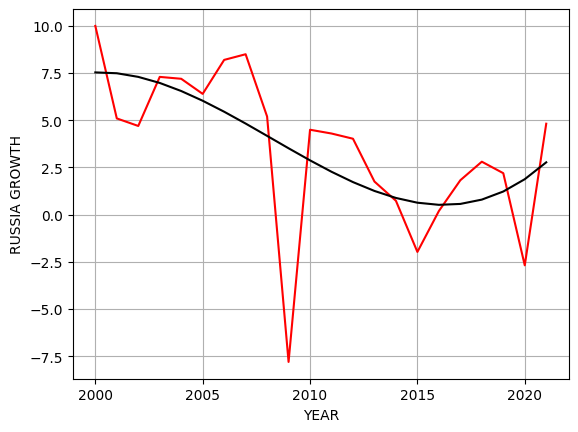

In [225]:
plt.plot('RUS', data=rus_gdp, color='RED')
plt.plot(results.fittedvalues, color='black', linestyle='-')
plt.grid()
plt.xticks(np.arange(0, 25, step=5))
plt.xlabel('YEAR')
plt.ylabel('RUSSIA GROWTH')